In [16]:
import pandas as pd

df = pd.read_csv('ABGIT01.csv')

# Convert timestamp to datetime and adjust to EST
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_convert('America/Toronto')

# Extract day of the week and 15-minute intervals
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['15_min_interval'] = df['timestamp'].dt.floor('15min').dt.time

In [17]:
df_cpuonly = df[['day_of_week', '15_min_interval', 'Percentage CPU']].copy()
df_cpuonly.dropna(inplace=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale and apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_cpuonly[['Percentage CPU']])

df_cpuonly['cpuScaledMinMax'] = scaled_values

In [19]:
from sklearn.preprocessing import StandardScaler

# Select columns to scale and apply MinMaxScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_cpuonly[['Percentage CPU']])

df_cpuonly['cpuScaledStandard'] = scaled_values

In [20]:
df_aggregated = df_cpuonly.groupby(['day_of_week', '15_min_interval'], as_index=False).mean()
df_aggregated

,day_of_week,15_min_interval,Percentage CPU,cpuScaledMinMax,cpuScaledStandard
0,0,00:00:00,1.046893,0.009984,-0.073126
1,0,00:15:00,1.740168,0.019251,0.231783
2,0,00:30:00,1.138333,0.011206,-0.032909
3,0,00:45:00,1.219816,0.012295,0.002928
4,0,01:00:00,1.054949,0.010092,-0.069582
...,...,...,...,...,...
667,6,22:45:00,0.868650,0.007601,-0.151518
668,6,23:00:00,1.237163,0.012527,0.010557
669,6,23:15:00,1.036362,0.009843,-0.077757
670,6,23:30:00,1.330632,0.013777,0.051665


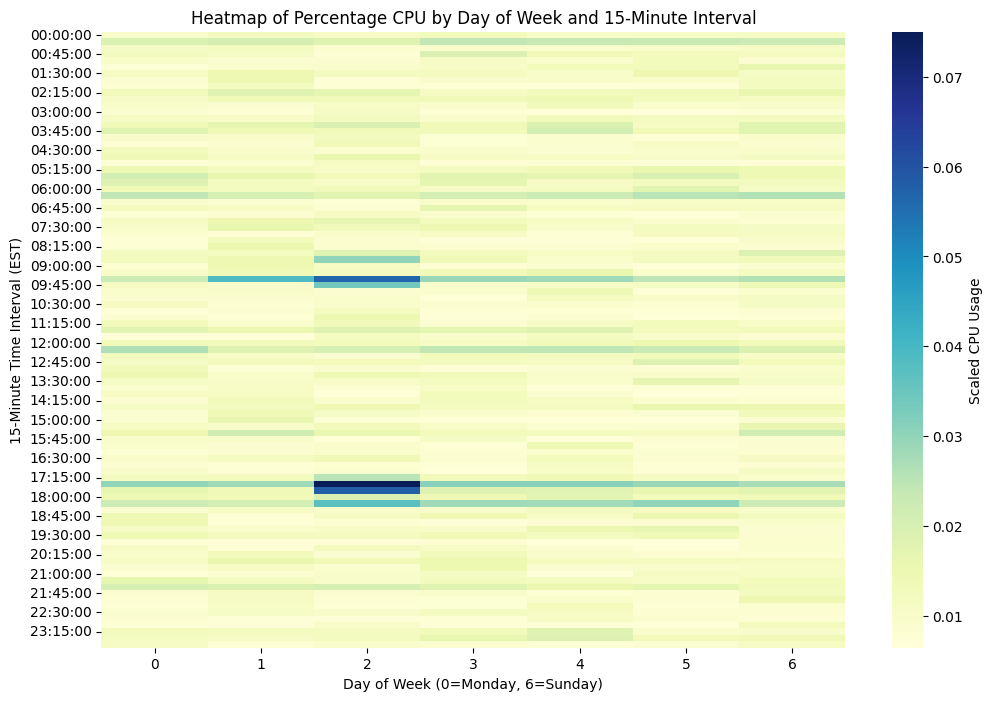

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot for heatmap; here using 'Percentage CPU' as an example metric
# heatmap_data = df_aggregated.pivot(index='15_min_interval', columns='day_of_week', values='cpuScaledStandard')
# heatmap_data = df_aggregated.pivot(index='15_min_interval', columns='day_of_week', values='cpuScaledMinMax')
heatmap_data = df_aggregated.pivot(index='15_min_interval', columns='day_of_week', values='Percentage CPU')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Scaled CPU Usage'})
plt.title("Heatmap of Percentage CPU by Day of Week and 15-Minute Interval")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("15-Minute Time Interval (EST)")
plt.show()

<Axes: xlabel='Percentage CPU', ylabel='Count'>

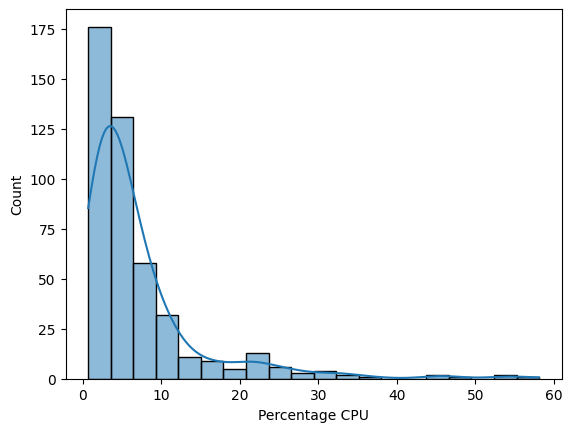

In [14]:
sns.histplot(df_aggregated['Percentage CPU'], kde=True, bins=20)
# sns.histplot(df_aggregated['cpuScaledStandard'], kde=True, bins=20)

In [15]:
df_aggregated.describe()

,day_of_week,Percentage CPU,cpuScaledMinMax,cpuScaledStandard
count,457.000000,457.000000,457.000000,457.000000
mean,2.997812,7.050319,0.068471,0.064725
std,2.000547,8.104064,0.081538,0.631492
min,0.000000,0.703000,0.004608,-0.429877
25%,1.000000,2.500756,0.022696,-0.289790
50%,3.000000,4.424700,0.042054,-0.139871
75%,5.000000,8.202125,0.080060,0.154477
max,6.000000,58.107500,0.582176,4.043249
